# Week3授業課題 信用情報の分析（home credit）
## テキストの目的
実データに近いものの分析を行う

データセットに対して自ら課題を設定できるようにする

## どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

In [1]:
import os # ファイルの読み込み先のpath指定する時に必要
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？

#### Home Creditはどのような企業？  
銀行にお金を借りれない人に対して、お金をかすサービスを提供している。  
#### このコンペティションでは何を予測する？  
電話会社や取引情報などの様々な代替データを利用して、クライアントの返済能力を予測しています。  TARGET、ターゲット変数（1-支払いが困難なクライアント：サンプルのローンの最初のY分割払いの少なくとも1つでX日以上遅れて支払いがあった、0-その他すべてのケース（期日内に返済出来ている人））

#### それを予測することで企業が得られるメリットは何？  
返済能力のある顧客を見極めることが出来、逆に返済能力のない顧客にはお金をかすリスクを減らせる。  

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

.head()、.info()、describe()などを使う  
欠損値の有無を見る  
クラスごとのデータ数をグラフに出す  
それぞれ結果に対する説明や考察も行ってください。

#### .head()、.info()、describe()などを使う

In [2]:
data = pd.read_csv("../../../dic_ml_ans/application_train.csv")
# 先頭５行を表示させる
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 有効データ数、データ型、メモリ使用量を表示させる
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
# 数値データに対して各種統計量を計算
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### 欠損値の有無を見る

In [5]:
# 欠損値の有無。.count()を使用して、列に対してNAN以外の数をカウントする。
# .info()から307511レコード未満のカラムは欠損値を含んでいる。
data.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
FLAG_OWN_REALTY               307511
CNT_CHILDREN                  307511
AMT_INCOME_TOTAL              307511
AMT_CREDIT                    307511
AMT_ANNUITY                   307499
AMT_GOODS_PRICE               307233
NAME_TYPE_SUITE               306219
NAME_INCOME_TYPE              307511
NAME_EDUCATION_TYPE           307511
NAME_FAMILY_STATUS            307511
NAME_HOUSING_TYPE             307511
REGION_POPULATION_RELATIVE    307511
DAYS_BIRTH                    307511
DAYS_EMPLOYED                 307511
DAYS_REGISTRATION             307511
DAYS_ID_PUBLISH               307511
OWN_CAR_AGE                   104582
FLAG_MOBIL                    307511
FLAG_EMP_PHONE                307511
FLAG_WORK_PHONE               307511
FLAG_CONT_MOBILE              307511
FLAG_PHONE                    307511
F

#### クラスごとのデータ数をグラフに出す

In [6]:
data_0 = data[data["TARGET"] == 0 ]# 返済可能見込みl顧客
data_1 = data[data["TARGET"] == 1] # 返済不可見込み顧客

In [7]:
# 返済可能見込み顧客は282686人いる
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 265.3+ MB


In [8]:
# 返済不可見込み顧客は24825人いる
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 23.3+ MB


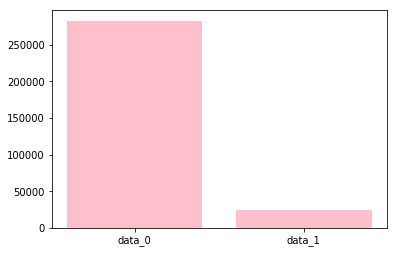

In [9]:
# クラス毎のデータ数をグラフ化
left = np.array(["data_0", "data_1"]) # 横軸の名前
hight = np.array([len(data_0), len(data_1)]) # 縦軸に対象数
plt.bar(left, hight, color="pink")
plt.show()

.corr()を使って相関係数を見てみます。

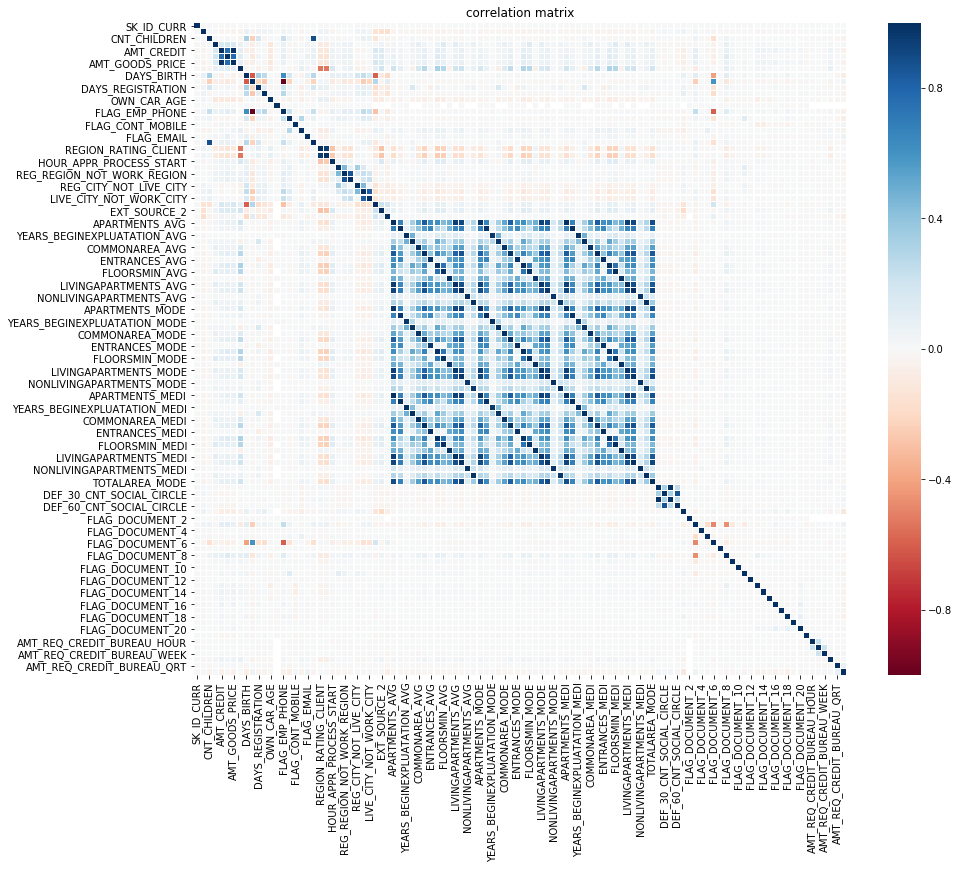

In [11]:
data_corr = data.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15, 12))
plt.title("correlation matrix")
sns.heatmap(data_corr, linewidth=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=False)
plt.show()

### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

>1.目的関数と相関が大きい特徴量は何？  
2.逆に相関が小さい特徴量は何？  
3.相関のありそうな特徴量と目的関数の関係について見てみたい。 

>仮説１：収入の多い人は、返済能力が高いのではないか？  
仮説２：返済が困難な人は、借金の有無や金額が多くなるのではないか？  
仮説３：収入に対する借金の比率は、返済能力によって異なるのではないか？  
仮説４：携帯電話の有無は、返済能力の有無を判断できるのでは？  
仮説５：子供の人数が返済能力に影響するのではないか？  
仮説６：支払い困難者が居住するエリアは評価の低いエリアに集中するのでは？  
仮説７：職種を答えていない人（欠損）は、返済能力が低いのではないか？  

### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。
考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [12]:
# 1.目的関数と相関が大きい特徴量は何？
# 目的関数（TARGET）だけ引っ張ってきて、値の高い順に並べる。
df_corr_target  = data_corr["TARGET"].sort_values(ascending=False)
print(df_corr_target[1:15])

# これは目的関数でしばれていないので、全特徴量が表示されてしまう。
# df_corr_target  = df_corr.sort_values("TARGET", ascending=False)
# print(df_corr_target[1:15])

# そもそも何でソートするかを書く必要があるのでコケる
# df_corr_target  = df_corr.sort_values(ascending=False)
# print(df_corr_target[1:15])

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64


In [13]:
# 2.逆に相関が小さい特徴量は何？
# 目的関数の下位20を表示。
print(df_corr_target[-20:-1])

AMT_CREDIT                   -0.030369
LIVINGAREA_MODE              -0.030685
ELEVATORS_MODE               -0.032131
TOTALAREA_MODE               -0.032596
FLOORSMIN_MODE               -0.032698
LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
Name: TARGET, dtype: float64


In [15]:
# 相関が無い特徴量ってどうなっているの？？
a = data[data["TARGET"] == 0]["CNT_CHILDREN"]
a

1         0
2         0
3         0
4         0
5         0
6         1
7         0
8         0
9         0
10        1
11        0
12        0
13        1
14        0
15        0
16        0
17        1
18        0
19        1
20        0
21        1
22        1
23        0
24        2
25        0
27        1
28        0
29        0
30        0
31        0
         ..
307478    0
307479    1
307480    1
307482    0
307483    0
307484    0
307485    1
307486    1
307487    0
307488    0
307490    0
307491    2
307492    0
307493    0
307494    1
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    3
307502    1
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307510    0
Name: CNT_CHILDREN, Length: 282686, dtype: int64

In [16]:
# 3.相関のありそうな特徴量と目的関数の関係について見てみたい。
# 相関の高そうな目的関数、子持ち、収入、クレジットカード状態をピックアップしてみる。
data_test = data.loc[:, ["TARGET", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT"]]
data_test.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,1,0,202500.0,406597.5
1,0,0,270000.0,1293502.5
2,0,0,67500.0,135000.0
3,0,0,135000.0,312682.5
4,0,0,121500.0,513000.0


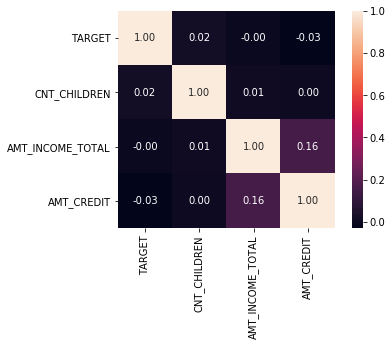

In [17]:
# ヒートマップ化してみる
data_test_corr = data_test.corr()

# annot: 数値を表示するか(annotation)
# square: 四角を正方形に合わせるか
# fmt: 表示する数値の形式(formatting)
# sns.heatmap(housing_data2_corr1[housing_data2_corr1>=0.8], annot=True, square=True, fmt='.2f')

sns.heatmap(data_test_corr, annot=True, square=True, fmt='.2f')

In [19]:
# 中身の確認
data_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


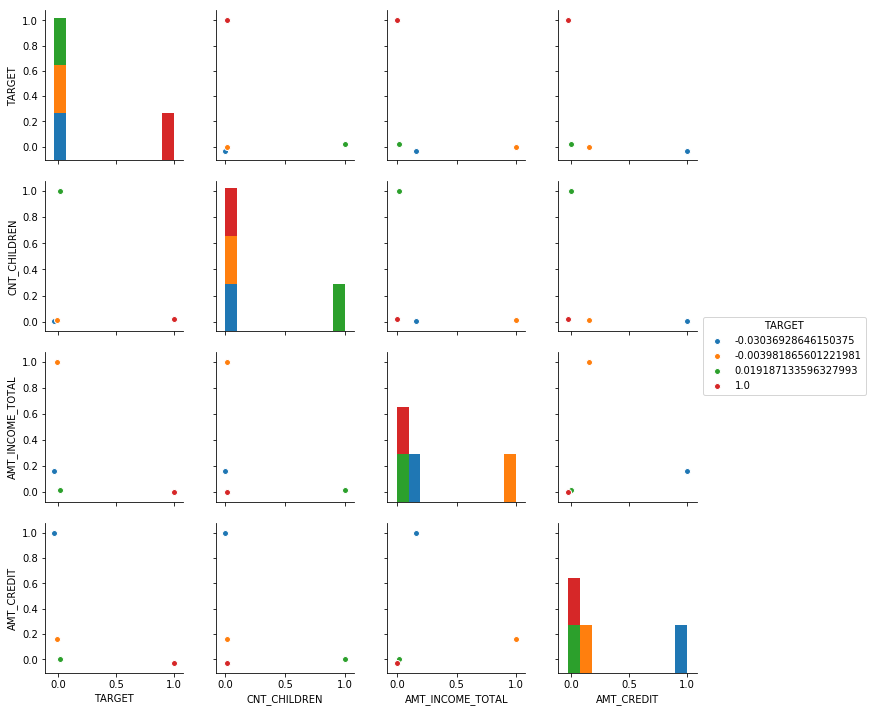

In [21]:
sns.pairplot(data_test_corr, hue='TARGET')

#### 1.目的関数と相関が大きい特徴量は何？

誕生年月日や評価クライアント（おそらくhome credit 社の顧客）は返済能力と高い関係がありそう。
年配の方や普段から返済されている方（常連さん？）は返済能力が高い。携帯電話変更も相関が高いのが不思議。

#### 2.逆に相関が小さい特徴量は何？

日雇いの方、部屋の広さ、人口密度等は返済能力が低い事に関係がありように見える。
部屋の広さの話はわからないが、給与が安定しない方や、集合住宅に住んでいる方は説得力がある。

#### 3.相関のありそうな特徴量と目的関数の関係について見てみたい。

子供と収入よりも、収入とクレジットカードの相関が大きいことが以外だった。

In [23]:
#相関が高いものを上と下それぞれ１０個ずつ抽出し、特徴量の名前を使いターゲットごとに抽出する

data_corr_target = data_corr["TARGET"].sort_values(ascending=False)
data_corr_mix = pd.concat([data_corr_target[1:11], data_corr_target[-11:-1]], axis=0)

data_index = data_corr_mix.index        #特徴量の名前を抜き出しておく

new_data_0 = data_0[data_index]
new_data_1 = data_1[data_index]
# 欠損地

""" 欠損値があるのでエラーになる"""
for index in data_index:
    plt.title(index)
    plt.hist(new_data_0[index], alpha=0.3, color="red", label="0")
    plt.hist(new_data_1[index], alpha=0.3, color="blue", label="1")
    plt.legend()
    plt.show()

In [25]:
#欠損値の処理　　ここでは欠損値があればすべで削除した
data_0_dr = data_0.dropna()
data_1_dr = data_1.dropna()

In [26]:
#勘で選んだものを含めて再度特徴量を抜き出した
manual_choice_colums = ["DAYS_BIRTH", "EXT_SOURCE_1","EXT_SOURCE_2", "CNT_CHILDREN","AMT_INCOME_TOTAL",
                     "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "OCCUPATION_TYPE", "REGION_RATING_CLIENT_W_CITY",
                     "AMT_REQ_CREDIT_BUREAU_HOUR",  "AMT_REQ_CREDIT_BUREAU_WEEK","APARTMENTS_AVG",
                     "ORGANIZATION_TYPE", "HOUR_APPR_PROCESS_START", "FLAG_EMAIL" ]

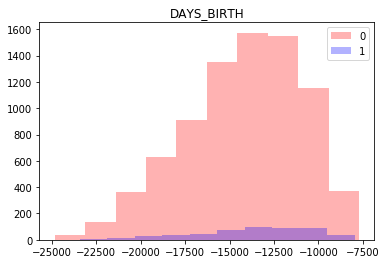

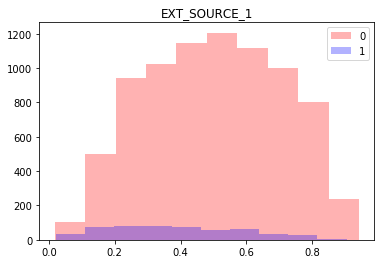

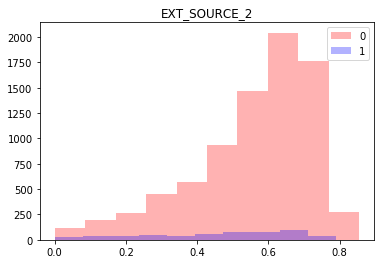

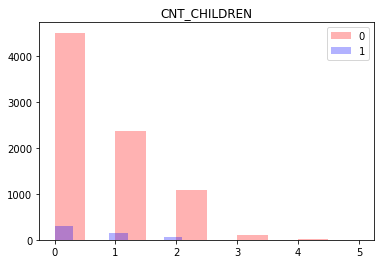

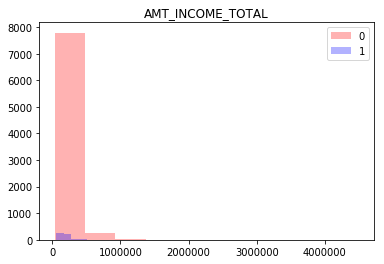

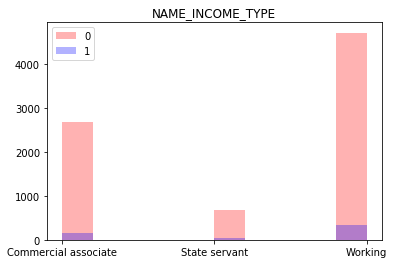

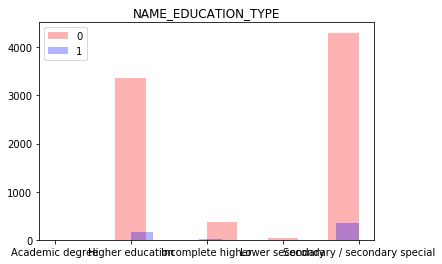

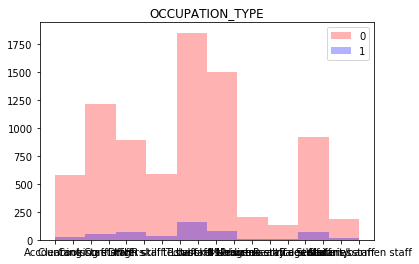

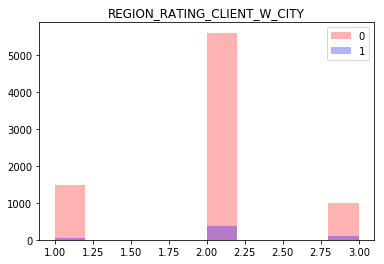

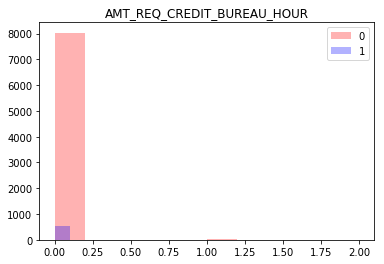

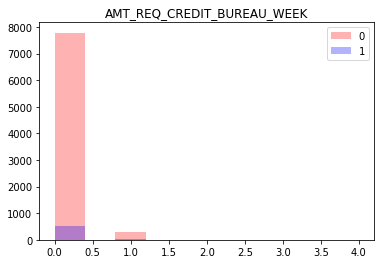

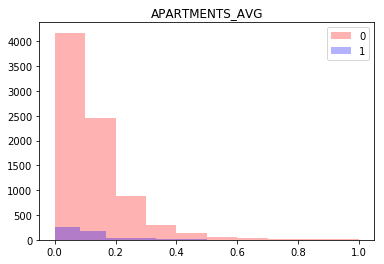

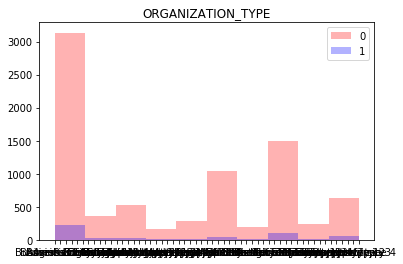

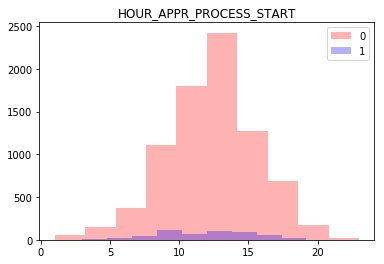

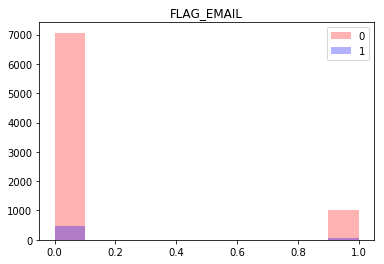

In [27]:
#それぞれグラフに表示　カテゴリーデータの場合はリストに加える処理をした
miss_colum = []
for index in manual_choice_colums:
    try:
        plt.title(index)
        plt.hist(data_0_dr[index], alpha=0.3, color="red", label="0")
        plt.hist(data_1_dr[index], alpha=0.3, color="blue", label="1")
        plt.legend()
        plt.show()
    except:
        miss_colum.append(index)

### 【問題5】（アドバンス課題）カーネルへの投稿
必須ではありませんが、コンペティションのKernelページに今回作成したEDAのノートブックを投稿することを推奨しています。

とりあえずやり方だけは分かったので良しとする。
https://www.kaggle.com/shuji0001/20200121-practice/edit